# **Kriteria 1: Melakukan Eksperimen terhadap Dataset Pelatihan**

**Basic (2 pts)**

- Melakukan tahapan experimentation secara manual.
- Melakukan data loading pada notebook.
- Melakukan EDA pada notebook.
- Melakukan preprocessing pada notebook.

**Skilled (3 pts)**
- Tahap basic terpenuhi.
- Membuat sebuah file automate_Nama-siswa.py yang berisikan fungsi untuk melakukan preprocessing secara otomatis sehingga mengembalikan data yang siap dilatih.
- Pada tahap ini Anda harus melakukan konversi dari proses eksperimen sebelumnya, sehingga tahapannya harus sama tetapi memiliki struktur yang berbeda.

**Advance (4 pts)**
- Tahap skilled terpenuhi.
- Membuat sebuah workflow pada GitHub Actions agar dapat melakukan preprocessing setiap kali trigger terpantik.
- Anda harus membuat sebuah repository dengan nama Eksperimen_SML_Nama-siswa berisi seluruh file yang sama dengan rekomendasi struktur folder pada kriteria 1.
- Pastikan Actions yang dibuat mengembalikan sebuah dataset terbaru yang sudah diproses sedemikian rupa.

## **1. Perkenalan Dataset**



**1. Sumber Dataset**:  
Dataset yang digunakan adalah Instax Sales Transaction Dataset yang diperoleh dari Kaggle (public dataset). Dataset ini berisi data transaksi penjualan produk Fujifilm Instax dengan rentang waktu Mei 2022 hingga Mei 2025.


**Informasi Umum Dataset**
- Sumber: Kaggle
- Jumlah data: ±10.000 baris
- Rentang waktu: Mei 2022 – Mei 2025
- Jenis data: Data terstruktur (tabular)
- Mata uang: IDR

**Atribut Dataset**
- Tanggal
- Tahun
- Bulan
- Hari
- Kategori
- Nama_Produk
- Lokasi_Toko
- Metode_Bayar
- Harga_Satuan
- Qty
- Diskon_IDR
- Total_Penjualan

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [41]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from automate_ShifaNabila import preprocess_data

plt.style.use("seaborn-v0_8")

# **3. Memuat Dataset**

In [42]:
# Memuat dataset
df = pd.read_csv("instax_sales_transaction_data.csv")

# Menampilkan 5 baris pertama
df.head()

,Tanggal,Tahun,Bulan,Hari,Kategori,Nama_Produk,Lokasi_Toko,Metode_Bayar,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
0,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,9250,175750
1,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Tokopedia Official,Kartu Kredit,185000,1,0,185000
2,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000
3,2022-05-01,2022,5,Sunday,Kamera,Instax Mini 11,Shopee Mall,Paylater,1100000,1,0,1100000
4,2022-05-01,2022,5,Sunday,Film,Instax Mini Film (20s),Shopee Mall,E-Wallet (Gopay/OVO),185000,2,0,370000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [43]:
# Informasi Dasar Dataset
print("\n--- Eksplorasi Data Awal ---")

# Menampilkan tipe data & jumlah non-null
print("\n[Info] Tipe Data & Jumlah Non-Null:")
df.info()

# Statistik deskriptif fitur numerik
print("\n[Info] Statistik Deskriptif:")
display(df.describe())

# Melihat jumlah missing value
df.isnull().sum()


--- Eksplorasi Data Awal ---

[Info] Tipe Data & Jumlah Non-Null:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12334 entries, 0 to 12333
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Tanggal          12334 non-null  object
 1   Tahun            12334 non-null  int64 
 2   Bulan            12334 non-null  int64 
 3   Hari             12334 non-null  object
 4   Kategori         12334 non-null  object
 5   Nama_Produk      12334 non-null  object
 6   Lokasi_Toko      12334 non-null  object
 7   Metode_Bayar     12334 non-null  object
 8   Harga_Satuan     12334 non-null  int64 
 9   Qty              12334 non-null  int64 
 10  Diskon_IDR       12334 non-null  int64 
 11  Total_Penjualan  12334 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB

[Info] Statistik Deskriptif:


,Tahun,Bulan,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
count,12334.000000,12334.000000,1.233400e+04,12334.000000,1.233400e+04,1.233400e+04
mean,2023.485244,6.790011,3.989071e+05,1.940814,1.290899e+04,5.205712e+05
std,0.928167,3.872200,6.915002e+05,1.151353,4.618240e+04,7.033379e+05
min,2022.000000,1.000000,5.000000e+04,1.000000,0.000000e+00,4.000000e+04
25%,2023.000000,3.000000,9.500000e+04,1.000000,0.000000e+00,1.500000e+05
50%,2024.000000,7.000000,1.500000e+05,2.000000,0.000000e+00,2.707500e+05
75%,2024.000000,10.000000,1.850000e+05,3.000000,7.500000e+03,5.272500e+05
max,2025.000000,12.000000,2.900000e+06,5.000000,1.160000e+06,5.800000e+06


,0
Tanggal,0
Tahun,0
Bulan,0
Hari,0
Kategori,0
Nama_Produk,0
Lokasi_Toko,0
Metode_Bayar,0
Harga_Satuan,0
Qty,0


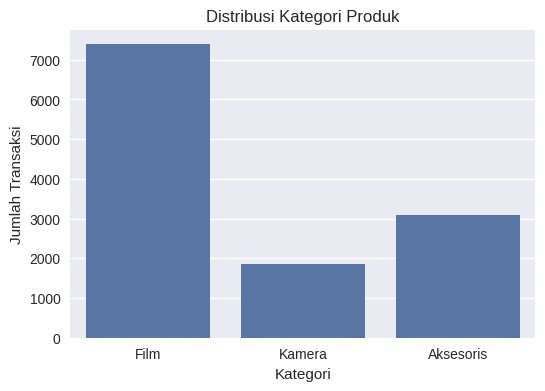

In [44]:
# Distribusi Kategori Produk
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Kategori")
plt.title("Distribusi Kategori Produk")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Transaksi")
plt.show()

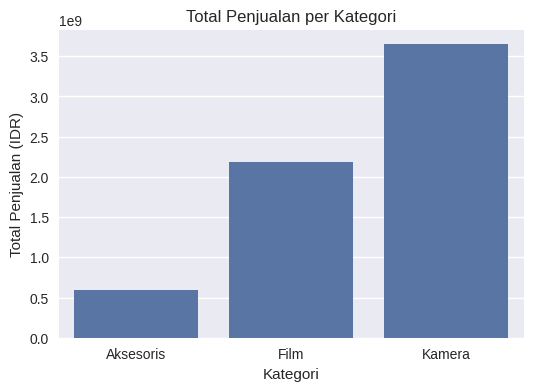

In [45]:
# Total Penjualan per Kategori
sales_per_category = df.groupby("Kategori")["Total_Penjualan"].sum().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=sales_per_category, x="Kategori", y="Total_Penjualan")
plt.title("Total Penjualan per Kategori")
plt.xlabel("Kategori")
plt.ylabel("Total Penjualan (IDR)")
plt.show()

# **5. Data Preprocessing**

In [46]:
# Mengecek jumlah data kosong
df.isnull().sum()

# Menghapus baris yang memiliki nilai kosong (jika ada)
df_clean = df.dropna()

In [47]:
# Mengecek dan menghapus data duplikat
df_clean = df_clean.drop_duplicates()
print("Jumlah data setelah hapus duplikat:", len(df_clean))

Jumlah data setelah hapus duplikat: 12205


In [48]:
# Mengubah kolom Tanggal menjadi format datetime
df_clean["Tanggal"] = pd.to_datetime(df_clean["Tanggal"])

In [49]:
# Encoding kolom kategorikal menggunakan one-hot encoding
df_encoded = pd.get_dummies(
    df_clean,
    columns=["Kategori", "Lokasi_Toko", "Metode_Bayar"],
    drop_first=True
)

In [50]:
# Memilih fitur numerik utama
df_final = df_encoded[[
    "Harga_Satuan",
    "Qty",
    "Diskon_IDR",
    "Total_Penjualan"
]]

In [51]:
# Cek ulang apakah data sudah bersih
df_clean.isnull().sum()
df_clean.info()
df_clean.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12333
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Tanggal          12205 non-null  datetime64[ns]
 1   Tahun            12205 non-null  int64         
 2   Bulan            12205 non-null  int64         
 3   Hari             12205 non-null  object        
 4   Kategori         12205 non-null  object        
 5   Nama_Produk      12205 non-null  object        
 6   Lokasi_Toko      12205 non-null  object        
 7   Metode_Bayar     12205 non-null  object        
 8   Harga_Satuan     12205 non-null  int64         
 9   Qty              12205 non-null  int64         
 10  Diskon_IDR       12205 non-null  int64         
 11  Total_Penjualan  12205 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 1.2+ MB


,Tanggal,Tahun,Bulan,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
count,12205,12205.000000,12205.000000,1.220500e+04,12205.000000,1.220500e+04,1.220500e+04
mean,2024-01-03 04:16:15.731257600,2023.483245,6.793445,3.992397e+05,1.944941,1.292458e+04,5.215125e+05
min,2022-05-01 00:00:00,2022.000000,1.000000,5.000000e+04,1.000000,0.000000e+00,4.000000e+04
25%,2023-04-12 00:00:00,2023.000000,3.000000,9.500000e+04,1.000000,0.000000e+00,1.500000e+05
50%,2024-01-13 00:00:00,2024.000000,7.000000,1.500000e+05,2.000000,0.000000e+00,2.707500e+05
75%,2024-10-19 00:00:00,2024.000000,10.000000,1.850000e+05,3.000000,7.500000e+03,5.272500e+05
max,2025-05-01 00:00:00,2025.000000,12.000000,2.900000e+06,5.000000,1.160000e+06,5.800000e+06
std,NaN,0.927732,3.870447,6.916176e+05,1.153600,4.619824e+04,7.038178e+05


In [52]:
# Menyimpan dataset hasil preprocessing
df_final.to_csv("instax_sales_preprocessing.csv", index=False)

In [53]:
# Membuat File Automate_ShifaNabila.py

%%writefile automate_ShifaNabila.py
import pandas as pd
import numpy as np

def preprocess_data(raw_data_path):
    """
    Performs preprocessing on the raw Instax sales transaction data.

    Args:
        raw_data_path (str): The file path to the raw dataset (CSV).

    Returns:
        pandas.DataFrame: The preprocessed DataFrame.
    """
    # 1. Muat dataset
    df = pd.read_csv(raw_data_path)

    # 2. Hapus baris yang mengandung nilai kosong
    df_clean = df.dropna()

    # 3. Hapus data duplikat
    df_clean = df_clean.drop_duplicates()

    # 4. Konversi kolom 'Tanggal' ke tipe data datetime
    df_clean["Tanggal"] = pd.to_datetime(df_clean["Tanggal"])

    # 5. Lakukan one-hot encoding pada kolom kategorikal
    df_encoded = pd.get_dummies(
        df_clean,
        columns=["Kategori", "Lokasi_Toko", "Metode_Bayar"],
        drop_first=True
    )

    # 6. Pilih kolom-kolom untuk DataFrame akhir
    df_final = df_encoded[[
        "Harga_Satuan",
        "Qty",
        "Diskon_IDR",
        "Total_Penjualan"
    ]]

    # 7. Simpan DataFrame hasil preprocessing ke file CSV baru
    df_final.to_csv("instax_sales_preprocessing.csv", index=False)

    print(f"Data preprocessed and saved to instax_sales_preprocessing.csv. Shape: {df_final.shape}")

    return df_final

Overwriting automate_ShifaNabila.py


In [54]:
# Membuat File namadataset_preprocessing
# Panggil fungsi preprocess_data
raw_data_path = "instax_sales_transaction_data.csv"
preprocessed_df = preprocess_data(raw_data_path)

# Tampilkan 5 baris pertama dari DataFrame yang sudah diproses
print("\n--- 5 Baris Pertama DataFrame yang Sudah Diproses ---")
display(preprocessed_df.head())

# Tampilkan informasi DataFrame yang sudah diproses
print("\n--- Informasi DataFrame yang Sudah Diproses ---")
preprocessed_df.info()

Data preprocessed and saved to instax_sales_preprocessing.csv. Shape: (12205, 4)

--- 5 Baris Pertama DataFrame yang Sudah Diproses ---


,Harga_Satuan,Qty,Diskon_IDR,Total_Penjualan
0,185000,1,9250,175750
1,185000,1,0,185000
2,185000,2,0,370000
3,1100000,1,0,1100000
5,95000,1,4750,90250



--- Informasi DataFrame yang Sudah Diproses ---
<class 'pandas.core.frame.DataFrame'>
Index: 12205 entries, 0 to 12333
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Harga_Satuan     12205 non-null  int64
 1   Qty              12205 non-null  int64
 2   Diskon_IDR       12205 non-null  int64
 3   Total_Penjualan  12205 non-null  int64
dtypes: int64(4)
memory usage: 476.8 KB
